# AWS Rekognition API

### Dieses Jupyter notebook zeigt, wie man mit dem Amazon Web Services (AWS) Rekognition Service / API Bilder klassifizieren kann.

Um dieses Notebook zu verwenden benötigt man

* einen AWS Account
* Credentials (AWS Access ID und AWS Secret Access Key) für den Zugriff auf das API
  * die können über IAM in der AWS Console eingerichtet werden
* Einrichten dieser Credentials auf dem Jupyter Server:
  * AWS CLI installieren (z.B. mit `sudo apt install awscli` auf einem Ubuntu System)
  * Aufruf von `aws configure`, um die Credentials zu konfigurieren:
    ```
    AWS Access Key ID [None]: ************************
AWS Secret Access Key [None]: *************************************
Default region name [None]: eu-west-1
Default output format [None]: text
    ```

Siehe auch [Getting Started with Amazon Rekognition](http://docs.aws.amazon.com/rekognition/latest/dg/getting-started.html).

Ausserdem muss auf dem Jupyter Server in der verwendeten Python Umgebung das Paket [boto3](http://boto3.readthedocs.io/en/latest/guide/quickstart.html) installiert sein, welches schlicht die Python-Implementierung des Amazon APIs ist.

Beispiele für die Verwendung des APIs in Python finden sich in [GitHub](https://gist.github.com/alexcasalboni/0f21a1889f09760f8981b643326730ff).

In [9]:
import os, os.path, random
import boto3
import cv2
import operator
import numpy as np
from __future__ import print_function

# Import library to display results
import matplotlib.pyplot as plt
%matplotlib inline 


In [10]:
# Variables
aws_region = 'eu-west-1'     # AWS Region
path = 'data/test/unknown'   # Where the file will be loaded from


Detected labels for data/test/unknown/705.jpg
Animal : 89.7589263916
Canine : 89.7589263916
Chihuahua : 89.7589263916
Dog : 89.7589263916
Mammal : 89.7589263916
Pet : 89.7589263916


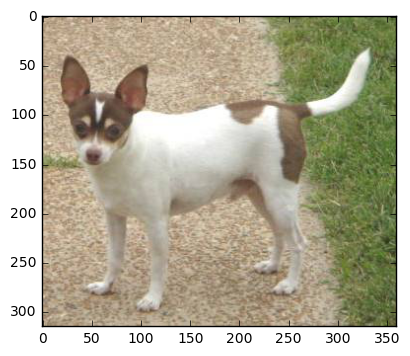

In [11]:
# Load random raw image file into memory
files = os.listdir(path)
pathToFileInDisk = os.path.join(path,files[random.randrange(0, len(files))])
with open( pathToFileInDisk, 'rb' ) as f:
    image_data = f.read()

# Call API
client = boto3.client('rekognition',aws_region)
response = client.detect_labels(Image={'Bytes': image_data }, MinConfidence=10)

# Show result
if response is not None:
    # Load the original image, fetched from the URL
    data8uint = np.fromstring( image_data, np.uint8 ) # Convert string to an unsigned int array
    img = cv2.cvtColor( cv2.imdecode( data8uint, cv2.IMREAD_COLOR ), cv2.COLOR_BGR2RGB )
    ig, ax = plt.subplots()
    ax.imshow( img )
    print('Detected labels for ' + pathToFileInDisk)
    for label in response['Labels']:
        print(label['Name'] + ' : ' + str(label['Confidence']))
